In [66]:
import pandas as pd
import numpy as np


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
test_data = pd.read_csv('Test Data.csv')
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [70]:
training_data = pd.read_csv('Training Data.csv')
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [71]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [72]:
sample_prediction = pd.read_csv('Sample Prediction Dataset.csv')
sample_prediction.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [73]:
sample_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         28000 non-null  int64
 1   risk_flag  28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [74]:
cata = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums = ['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

In [75]:
training_data[nums].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [76]:
training_data[cata].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [77]:
df = training_data

In [78]:
#Missing Value
print(training_data.isnull().sum())

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [79]:
#Duplicated Data
df.duplicated().sum()

0

In [80]:
for cat in ['House_Ownership'] :
  onehots = pd.get_dummies(df[cat], prefix = cat)
  df = df.join(onehots)

In [81]:
#Feature Encoding
mapping_status = {'single' : 0, 'married' : 1,}
df['Married/Single'] = df['Married/Single'].map(mapping_status)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,0,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,1,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,0,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,0,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,0,1


In [82]:
#Feature Encoding
mapping_car = {
    'no' : 0,
    'yes' : 1
}
df['Car_Ownership'] = df['Car_Ownership'].map(mapping_car)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,0,1


In [83]:
df_new = df.drop(columns=['Profession','CITY','STATE','House_Ownership']).copy()

In [84]:
col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[col].values)
features = scaler.transform(df[col].values)
scaled_features = pd.DataFrame(features, columns = col)

In [86]:
scaled_features.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.452420,0.499448
std,0.288130,0.294204,0.300129,0.260504,0.349759
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,0.214286,0.250000
50%,0.499557,0.500000,0.500000,0.428571,0.500000
75%,0.747495,0.758621,0.750000,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
df_new = df.drop(columns=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']).reset_index(drop = True)

In [88]:
df_concat = pd.concat([df_new,scaled_features],axis = 1)

In [89]:
df_concat = df_concat.drop(columns = ['Profession', 'CITY', 'STATE','House_Ownership'])
df_concat

,Id,Married/Single,Car_Ownership,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,0,0,0,0,0,1,0.129487,0.034483,0.15,0.214286,0.75
1,2,0,0,0,0,0,1,0.757206,0.327586,0.50,0.642857,0.75
2,3,1,0,0,0,0,1,0.398564,0.775862,0.20,0.285714,0.00
3,4,0,1,1,0,0,1,0.625263,0.344828,0.10,0.142857,0.50
4,5,0,0,1,0,0,1,0.576454,0.448276,0.55,0.214286,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,0,0,0,0,0,1,0.815303,0.379310,0.65,0.428571,0.25
251996,251997,0,0,0,0,0,1,0.283620,0.086207,0.50,0.428571,0.25
251997,251998,0,0,0,0,0,1,0.451682,0.431034,0.35,0.500000,0.50
251998,251999,0,0,0,0,0,1,0.650356,0.413793,0.00,0.000000,0.00


In [90]:
df_test = test_data

In [91]:
#Missing Value
print(df_test.isnull().sum())

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64


In [92]:
#Duplicated Data
df_test.duplicated().sum()

0

In [93]:
for cat in ['House_Ownership'] :
  onehots = pd.get_dummies(df[cat], prefix = cat)
  df_test = df_test.join(onehots)

In [94]:
#Feature Encoding
mapping_status = {'single' : 0, 'married' : 1,}
df_test['Married/Single'] = df_test['Married/Single'].map(mapping_status)
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,7393090,59,19,0,rented,no,Geologist,Malda,West Bengal,4,13,0,0,1
1,2,1215004,25,5,0,rented,no,Firefighter,Jalna,Maharashtra,5,10,0,0,1
2,3,8901342,50,12,0,rented,no,Lawyer,Thane,Maharashtra,9,14,0,0,1
3,4,1944421,49,9,1,rented,yes,Analyst,Latur,Maharashtra,3,12,0,0,1
4,5,13429,25,18,0,rented,yes,Comedian,Berhampore,West Bengal,13,11,0,0,1


In [95]:
#Feature Encoding
mapping_car = {
    'no' : 0,
    'yes' : 1
}
df_test['Car_Ownership'] = df_test['Car_Ownership'].map(mapping_car)
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,7393090,59,19,0,rented,0,Geologist,Malda,West Bengal,4,13,0,0,1
1,2,1215004,25,5,0,rented,0,Firefighter,Jalna,Maharashtra,5,10,0,0,1
2,3,8901342,50,12,0,rented,0,Lawyer,Thane,Maharashtra,9,14,0,0,1
3,4,1944421,49,9,1,rented,1,Analyst,Latur,Maharashtra,3,12,0,0,1
4,5,13429,25,18,0,rented,1,Comedian,Berhampore,West Bengal,13,11,0,0,1


In [96]:
df_new_test = df_test.drop(columns=['Profession','CITY','STATE','House_Ownership']).copy()

In [97]:
col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df_new_test[col].values)
features = scaler.transform(df_new_test[col].values)
scaled_features = pd.DataFrame(features, columns = col)

In [99]:
scaled_features.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,0.502453,0.500943,0.506020,0.452806,0.497946
std,0.286795,0.295343,0.301366,0.260373,0.349439
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253777,0.241379,0.250000,0.214286,0.250000
50%,0.504173,0.500000,0.500000,0.428571,0.500000
75%,0.747217,0.758621,0.750000,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df_new_bgt = df_test.drop(columns=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']).reset_index(drop = True)

In [101]:
df_concat_test = pd.concat([df_new_bgt,scaled_features],axis = 1)

In [102]:
df_concat_test.describe()

,ID,Married/Single,Car_Ownership,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,14000.500000,0.101071,0.299107,0.028000,0.051357,0.920643,0.502453,0.500943,0.506020,0.452806,0.497946
std,8083.048105,0.301429,0.457875,0.164976,0.220729,0.270300,0.286795,0.295343,0.301366,0.260373,0.349439
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.253777,0.241379,0.250000,0.214286,0.250000
50%,14000.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.504173,0.500000,0.500000,0.428571,0.500000
75%,21000.250000,0.000000,1.000000,0.000000,0.000000,1.000000,0.747217,0.758621,0.750000,0.642857,0.750000
max,28000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
df_test = df_concat_test
df_test = df_test.drop(columns =['Profession','CITY','STATE','House_Ownership']).copy()

In [104]:
df_test

,ID,Married/Single,Car_Ownership,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,0,0,0,0,1,0.739054,0.655172,0.95,0.285714,0.75
1,2,0,0,0,0,1,0.120596,0.068966,0.25,0.357143,0.00
2,3,0,0,0,0,1,0.890037,0.500000,0.60,0.642857,1.00
3,4,1,1,0,0,1,0.193614,0.482759,0.45,0.214286,0.50
4,5,0,1,0,0,1,0.000312,0.068966,0.90,0.928571,0.25
...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,0,0,0,0,1,0.995562,0.620690,0.65,0.357143,0.00
27996,27997,0,0,0,0,1,0.291051,0.448276,0.45,0.642857,1.00
27997,27998,0,0,0,0,1,0.808059,0.051724,0.25,0.285714,0.75
27998,27999,0,1,0,0,1,0.947381,0.517241,0.65,0.928571,1.00


In [105]:
X = df_concat.drop(columns = ['Risk_Flag'])
y = df_concat['Risk_Flag']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [106]:
df_concat.Risk_Flag.value_counts(normalize=True)

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

In [107]:
y_train.value_counts()

0    154675
1     21725
Name: Risk_Flag, dtype: int64

##Handling Class Imbalance

In [108]:
# pemisahan features vs target
Ximb = df_concat
yimb = df_concat['Risk_Flag'].values
print(Ximb.shape)
print(yimb.shape)

(252000, 12)
(252000,)


In [109]:
from imblearn import under_sampling, over_sampling

In [110]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5).fit_resample(Ximb, yimb)
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(Ximb, yimb)

In [111]:
print('Original')
print(pd.Series(yimb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())

Original
0    221004
1     30996
dtype: int64


UNDERSAMPLING
0    61992
1    30996
dtype: int64


OVERSAMPLING
0    221004
1    110502
dtype: int64


In [112]:
df_concat['Risk_Flag'].value_counts(normalize=True)

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

**Pakai data setelah split, traintest terbaru**

In [113]:
X_train_imb = X_train.copy()
y_train_imb = y_train.copy()

In [114]:
# X_train_imb 

print(X_train_imb.shape)
print(y_train_imb.shape)

(176400, 11)
(176400,)


In [115]:
X_train_under, y_train_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train_imb, y_train_imb)
X_train_over, y_train_over = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train_imb, y_train_imb)

In [116]:
print('Original')
print(pd.Series(y_train_imb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_train_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_train_over).value_counts())

Original
0    154675
1     21725
Name: Risk_Flag, dtype: int64


UNDERSAMPLING
0    43450
1    21725
Name: Risk_Flag, dtype: int64


OVERSAMPLING
0    154675
1     77337
Name: Risk_Flag, dtype: int64


In [117]:
print('Original')
print(pd.Series(y_train_imb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_train_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_train_over).value_counts())

Original
0    154675
1     21725
Name: Risk_Flag, dtype: int64


UNDERSAMPLING
0    43450
1    21725
Name: Risk_Flag, dtype: int64


OVERSAMPLING
0    154675
1     77337
Name: Risk_Flag, dtype: int64


In [118]:
# jadikan dataframe y_train setelah handleimbalance
y_train_imb = pd.DataFrame(y_train_imb, columns = ['Risk_Flag'])
y_train_under = pd.DataFrame(y_train_under, columns = ['Risk_Flag'])
y_train_over = pd.DataFrame(y_train_over, columns = ['Risk_Flag'])

# Modelling

## Model Evaluasi (default)





In [119]:
import matplotlib.pyplot as plt

In [120]:
# Model Evaluation - cross validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_cv(model):
    score = cross_validate(model, X_train_over, y_train_over, scoring='roc_auc', 
                           return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval validation): '+ str(score['test_score'].mean()))

def show_feature_importance1(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_over.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_over, y_train_over)
eval_cv(logreg)

roc_auc (crossval train): 0.4723338243013592
roc_auc (crossval validation): 0.47233587213576156


## K-Nearest Neighbor

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train_over, y_train_over)
eval_cv(knn)

roc_auc (crossval train): 0.931525764817861
roc_auc (crossval validation): 0.8354667510559495


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train_over, y_train_over)
eval_cv(knn)

roc_auc (crossval train): 0.931525764817861
roc_auc (crossval validation): 0.8354667510559495


## Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_over, y_train_over)
eval_cv(dt)

roc_auc (crossval train): 1.0
roc_auc (crossval validation): 0.9373850872444617


## ADABoost

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# ada = AdaBoostClassifier(random_state=42)
# ada.fit(X_train_over, y_train_over)
# eval_classification(ada)

In [128]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_over, y_train_over)
eval_cv(ada)

roc_auc (crossval train): 0.6677640924077461
roc_auc (crossval validation): 0.66722290234204


## XGBoost

In [ ]:
# from xgboost import XGBClassifier

# xg = XGBClassifier(random_state=42)
# xg.fit(X_train_over, y_train_over)
# eval_classification(xg)

In [132]:
import sys
!{sys.executable} -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.5 MB/s eta 0:00:0000:0100:01


In [133]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train_over, y_train_over)
eval_cv(xg)

roc_auc (crossval train): 0.9583584564639454
roc_auc (crossval validation): 0.9478122639448306


## Random Forest Model

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train_over, y_train_over)

y_pred_SMOTE = rf.predict(X_test)
eval_cv(rf)

roc_auc (crossval train): 0.999999999973876
roc_auc (crossval validation): 0.9957378781550791


In [139]:
# eval
def eval_classification(model):
    y_pred = model.predict(X_test)
    #y_pred_train = model.predict(X_train_over)
    y_pred_proba = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_over.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [140]:
# evaluasi model tanpa tuning
eval_classification(rf)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.67
Recall (Test Set): 0.49
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.92


## Hyperparameter Tuning


In [141]:
# eval
def eval_classification(model):
    y_pred = model.predict(X_test)
    #y_pred_train = model.predict(X_train_over)
    y_pred_proba = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_over.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [143]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs = rs.fit(X_train_over, y_train_over)

eval_classification(rs)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.70
Recall (Test Set): 0.55
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.94


In [144]:
rs.best_params_

{'n_estimators': 736,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 46,
 'criterion': 'gini'}

In [145]:
# rs with best params

rsb = RandomForestClassifier(random_state=42, 
                             n_estimators =  736, 
                             min_samples_split =  12,
                             min_samples_leaf =  2,
                             max_depth =  46,
                             criterion =  'gini')
rsb = rsb.fit(X_train_over, y_train_over)

### Learning Curve

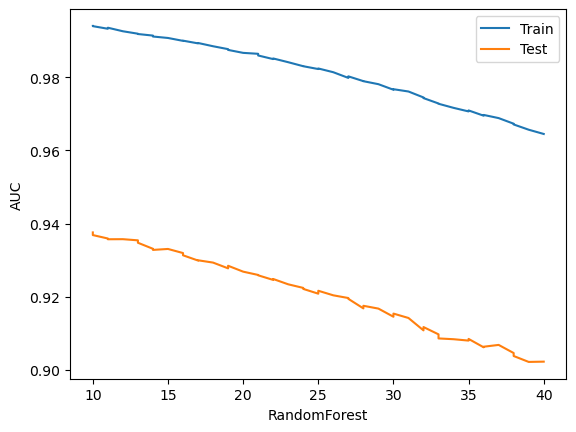

In [148]:
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf
train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=736, min_samples_leaf=i)
    model.fit(X_train_over, y_train_over)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_over)
    train_auc = roc_auc_score(y_train_over, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    #print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

## Classification Report

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     66329
           1       0.67      0.49      0.56      9271

    accuracy                           0.91     75600
   macro avg       0.80      0.73      0.76     75600
weighted avg       0.90      0.91      0.90     75600



In [151]:
# confusion matrix pada test set | randomforest tanpa tuning
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_SMOTE)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# y_test_pred = rs.predict_proba(X_test)[:,1] > 0.5
# print(classification_report(y_test, y_test_pred, labels=[1,0]))

In [ ]:
y_test_pred = rs.predict(X_test)
print(classification_report(y_test, y_test_pred))

In [ ]:
# confusion matrix pada test set | randomforest tuned
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Fold Cross Validation

### Check Train & Validation pada masing-masing iterasi

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd


kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

### Cross Validation in Validation Set Only

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X_train_over, y_train_over, cv=kf, scoring='roc_auc')
result.mean()

### Cross Validation in Train Set & Validation Set

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X_train_over, y_train_over, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (validation): '+ str(score['test_score'].mean()))

# Feature Importance

In [ ]:
show_feature_importance1(rf)

In [ ]:
rf

In [ ]:
rsb

In [ ]:
# yang tuninig, dengan best_params
show_feature_importance(rsb)

### Feature Importance
Sesuai dengan hasil feature importance menggunakan data yang telah di tuning dengan best params, terdapat top 5 fitur yang mempengaruhi hasil prediksi Risk_Flag, yaitu:
1.  
2. 
3. 
4. 
5. 

### Business Insight 
Hasil dari model

....

Dalam memanfaatkan prediksi ini, perusahaan dapat melakukan beberapa tindakan, antara lain:

1. 
2. 

3. 

4. 

5. 

Dalam kesimpulannya, 
....

### Action Item

Berikut beberapa action item yang dapat diambil berdasarkan insight tersebut:

1. 
2. 
3. 
4. 
5. 

Dengan mengambil tindakan yang tepat berdasarkan insight tersebut, perusahaan dapat meningkatkan retensi pelanggan dan kinerja bisnis secara keseluruhan.